# Model Benchmarks

## Google Colab Setup
Run the cell below first to set up the environment.

In [ ]:
# Google Colab Setup - Run this cell first!
# This mounts Google Drive and navigates to the bioai_data folder

import os

# Check if running in Colab
IN_COLAB = 'google.colab' in str(get_ipython()) if 'get_ipython' in dir() else False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    # Change to the bioai_data folder (where notebooks and data live)
    DATA_DIR = '/content/drive/MyDrive/bioai_data'
    os.chdir(DATA_DIR)
    print(f"Working directory: {os.getcwd()}")
    print(f"Files available: {os.listdir('.')}")
else:
    print("Not running in Colab - using local paths")

In [52]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [56]:
# Load data
df = pd.read_csv('ML_dataset_methylation_drug_response.csv.gz',
                 index_col=0, compression='gzip')

print(f"Dataset loaded: {df.shape}")

# Separate columns by type
metadata_cols = ['primary site', 'primary histology', 'cosmic_id']
feature_cols = [col for col in df.columns if col.startswith('cg')]
drug_cols = [col for col in df.columns
             if col not in metadata_cols and not col.startswith('cg')]

print(f"\nMetadata columns: {len(metadata_cols)}")
print(f"Feature columns (CpG sites): {len(feature_cols)}")
print(f"Drug target columns: {len(drug_cols)}")

# Extract features (X) and all drug targets (y)
X = df[feature_cols]            # Shape: (925, 10000)
y_all_drugs = df[drug_cols]     # Shape: (925, 375)
metadata = df[metadata_cols]

print(f"\nFeatures (X): {X.shape}")
print(f"All drug targets: {y_all_drugs.shape}")

Dataset loaded: (925, 10378)

Metadata columns: 3
Feature columns (CpG sites): 10000
Drug target columns: 375

Features (X): (925, 10000)
All drug targets: (925, 375)


In [ ]:
y_all_drugs['Avagacestat']

,(5Z)-7-Oxozeaenol,5-Fluorouracil,965-D2,993-D2,A-443654,A-770041,A-83-01,ACY-1215,AGI-6780,AICA Ribonucleotide,...,ZG-10,ZL049,ZL109,ZM447439,ZSTK474,Zibotentan,"eEF2K Inhibitor, A-484954",kb NB 142-70,rTRAIL,torin2
22RV1,2.473594,0.579534,3.072015,5.010936,NaN,NaN,5.299894,0.848553,2.072854,8.277564,...,2.216771,3.456567,0.704177,3.415833,-0.571660,5.886388,5.891054,2.989656,-0.586829,NaN
23132-87,1.301368,1.365854,3.036932,4.696090,NaN,NaN,5.371888,1.069621,1.808507,8.504796,...,NaN,3.582629,-0.153728,3.171768,0.052341,5.419213,5.460743,2.988242,-0.347357,NaN
42-MG-BA,0.588826,2.220896,2.992956,4.755989,NaN,NaN,3.793761,2.390197,1.303087,7.562482,...,NaN,2.995327,-0.980930,1.339098,2.235509,5.494359,5.566457,3.082294,-1.651262,NaN
451LU,-3.318480,4.792561,4.815939,4.402518,NaN,NaN,3.534849,1.467267,1.327098,8.796535,...,1.720577,3.290158,-0.756653,3.080837,2.359697,5.481833,5.630239,2.657428,-0.139989,NaN
5637,1.626606,3.166983,4.410360,4.227483,NaN,NaN,3.847780,1.039981,1.127383,8.011505,...,NaN,2.053874,0.046212,0.556022,0.239659,5.144572,5.273391,2.519340,-2.889220,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YH-13,-0.858999,5.626487,4.732312,4.736507,NaN,NaN,4.281385,1.124988,1.000514,9.042915,...,0.712498,2.348748,-0.409551,1.514446,0.242131,5.164013,5.539282,1.610461,0.131337,NaN
YKG-1,0.499784,4.074388,3.765386,4.776605,NaN,NaN,4.390300,1.853255,1.934874,6.477155,...,NaN,2.297815,-0.086315,1.239723,0.718917,5.048165,5.600037,2.003123,-1.560052,NaN
YMB-1-E,NaN,3.490093,NaN,NaN,NaN,NaN,3.552885,2.729916,2.494366,NaN,...,NaN,NaN,NaN,NaN,-0.508052,6.181953,6.255944,3.402388,NaN,NaN
YT,0.506163,-0.173922,4.449358,4.390753,2.238528,3.841682,4.291107,1.042755,1.061003,8.023256,...,NaN,2.737701,0.298806,1.466147,-3.425817,5.165823,5.211461,1.620578,-0.557084,NaN


In [5]:
df

,primary site,primary histology,cosmic_id,cg00944421,cg14557185,cg00989853,cg24702147,cg06723863,cg27174108,cg14481208,...,ZG-10,ZL049,ZL109,ZM447439,ZSTK474,Zibotentan,"eEF2K Inhibitor, A-484954",kb NB 142-70,rTRAIL,torin2
22RV1,urogenital_system,prostate,924100.0,0.005373,0.995386,0.000000,0.005776,0.004595,0.985648,0.009981,...,2.216771,3.456567,0.704177,3.415833,-0.571660,5.886388,5.891054,2.989656,-0.586829,NaN
23132-87,digestive_system,stomach,910924.0,0.000000,0.935833,0.000000,0.008962,0.002041,0.002005,0.026887,...,NaN,3.582629,-0.153728,3.171768,0.052341,5.419213,5.460743,2.988242,-0.347357,NaN
42-MG-BA,nervous_system,glioma,687561.0,0.994996,0.000000,1.000000,1.000000,1.000000,1.000000,0.995498,...,NaN,2.995327,-0.980930,1.339098,2.235509,5.494359,5.566457,3.082294,-1.651262,NaN
451LU,skin,melanoma,1287706.0,0.987326,0.007821,0.999773,0.988911,0.993848,0.987465,0.983869,...,1.720577,3.290158,-0.756653,3.080837,2.359697,5.481833,5.630239,2.657428,-0.139989,NaN
5637,urogenital_system,bladder,687452.0,0.010293,0.009700,0.000000,0.019619,0.001614,0.006393,0.037711,...,NaN,2.053874,0.046212,0.556022,0.239659,5.144572,5.273391,2.519340,-2.889220,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YH-13,nervous_system,glioma,909905.0,0.963341,0.005739,0.989838,0.992368,0.993164,0.989321,0.982065,...,0.712498,2.348748,-0.409551,1.514446,0.242131,5.164013,5.539282,1.610461,0.131337,NaN
YKG-1,nervous_system,glioma,687592.0,0.996477,0.007576,0.986879,0.996015,0.993360,0.996321,0.992586,...,NaN,2.297815,-0.086315,1.239723,0.718917,5.048165,5.600037,2.003123,-1.560052,NaN
YMB-1-E,breast,breast,1303911.0,0.010156,0.061949,0.000265,0.004980,0.000000,0.996504,0.015103,...,NaN,NaN,NaN,NaN,-0.508052,6.181953,6.255944,3.402388,NaN,NaN
YT,blood,lymphoid_neoplasm other,946358.0,1.000000,0.998999,0.998225,0.987221,1.000000,0.995139,0.990399,...,NaN,2.737701,0.298806,1.466147,-3.425817,5.165823,5.211461,1.620578,-0.557084,NaN


## The Low Down
So, reading in the data and the 
We have a multiple output regression problem where $X={X_1, X_2 \dots, X_n} \in \mathbb{R}^{k}$ and $Y ={Y_1, Y_2, \dots, Y_n}$, with a high dimensional data of 10000 features >> 925. 
That gives us a few options:

  - linear regression with PCA
  - Random Forest Regression
  - MARS
  - ElasticNet

So, let's try to benchmark each performance with this.

### Single Target

* used Avagacestat

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
drug = 'Avagacestat'
y = df[drug].dropna()  # Remove missing values
# Get matching samples
X_subset = X.loc[y.index].dropna(axis=1)  # Ensure no NaNs in features as well
y_subset = y.loc[X_subset.index]

X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

### Model Benchmark df

In [97]:
def add_benchmark_result(model, model_name, X_test, y_test, X_train, y_train):
	# Training performance
	y_pred_train = model.predict(X_train)
	testing_mse = -cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
	training_mse = mean_squared_error(y_train, y_pred_train)
	training_r2 = r2_score(y_train, y_pred_train)
	testing_r2 = cross_val_score(model, X_test, y_test, cv=5, scoring='r2')

	return [model_name, training_mse, testing_mse.mean(), training_r2, testing_r2.mean()]

In [98]:
benchmark_results = pd.DataFrame(columns=['Model', 'training MSE', 'average testing MSE', 'testing R^2','CV R^2'])

#### Linear Regression

In [95]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
benchmark_results.loc[len(benchmark_results)] = add_benchmark_result(model, 'Linear Regression', X_test, y_test, X_train, y_train)
benchmark_results

,Model,training MSE,average testing MSE,testing R^2,CV R^2
0,Linear Regression,1.752966e-29,0.38868,1.0,0.059445


### What about linear regression forms?

In [ ]:
### Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA	
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = PCA(n_components=15).fit_transform(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = PCA(n_components=15).fit_transform(X_test_scaled)

model = Ridge(alpha=0.05)
# scores = cross_val_score(model, X_scaled, y_train, cv=5, scoring='r2')
model.fit(X_train_scaled, y_train)

# print(f"\nRegression Type: Ridge Regression")
# print(f"Samples: {len(y_train)}")
# print(f'training R^2: {model.score(X_train_scaled, y_train)}')
# print(f"CV R²: {scores.mean():.3f} ± {scores.std():.3f}")
benchmark_results.loc[len(benchmark_results)] = add_benchmark_result(model, 'Ridge Regression', X_test_scaled, y_test, X_train_scaled, y_train)
### Lasso Regression
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
# scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
model.fit(X_train_scaled, y_train)


# print(f"\nRegression Type: Lasso")
# print(f"Samples: {len(y)}")
# print(f'training R^2: {model.score(X_scaled, y)}')
# print(f"CV R²: {scores.mean():.3f} ± {scores.std():.3f}")

benchmark_results.loc[len(benchmark_results)] = add_benchmark_result(model, 'Lasso Regression', X_test_scaled, y_test, X_train_scaled, y_train)
### PLS Regression
from sklearn.cross_decomposition import PLSRegression
model = PLSRegression(n_components=5)
# scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
model.fit(X_train_scaled, y_train)
# print(f"\nRegression Type: PLS Regression")
# print(f"Samples: {len(y)}")
# print(f'training R^2: {model.score(X_subset, y)}')
# print(f"CV R²: {scores.mean():.3f} ± {scores.std():.3f}")
benchmark_results.loc[len(benchmark_results)] = add_benchmark_result(model, 'PLS Regression', X_test_scaled, y_test, X_train_scaled, y_train)
benchmark_results

,Model,training MSE,average testing MSE,testing R^2,CV R^2
0,Linear Regression,1.752966e-29,0.388680,1.000000,0.059445
1,Ridge Regression,3.747608e-01,0.405121,0.079024,0.033133
2,Lasso Regression,3.787560e-01,0.375531,0.069206,0.100992
3,PLS Regression,3.747608e-01,0.405123,0.079024,0.033128


Ridge seems the best? but what what about non-linearities?

#### Multiple Output Regression( TBD)

In [20]:
from sklearn.multioutput import MultiOutputRegressor

(1, 20)

In [28]:
X_subset.shape, y_subset.shape

((1, 10000), (1, 375))

In [48]:

print(f"\nMulti-Output Regression Target Shape: {y_subset.shape}")
base_model = LinearRegression()
multi_output_model = MultiOutputRegressor(base_model)

multi_output_model.fit(X_subset, y_subset.transpose())
scores = cross_val_score(multi_output_model, X_subset, y_subset.transpose(), cv=5, scoring='r2')
print(f"\nMulti-Output Regression with Linear Regression")
print(f"Samples: {y_subset.shape[0]}")
print(f'Average training R^2: {multi_output_model.score(X_subset, y_subset.transpose())}')
print(f"CV R²: {scores.mean():.3f} ± {scores.std():.3f}")


Multi-Output Regression Target Shape: (1, 20)


ValueError: Found input variables with inconsistent numbers of samples: [1, 20]

## GAM

**Why GAM?**  
A **Generalized Additive Model (GAM)** extends linear regression by allowing each feature to have its own smooth, possibly nonlinear effect on the response.  
Instead of fitting one global coefficient per feature, GAM fits a **smooth function** \( f_j(x_j) \) for each variable \( x_j \):

$$
\hat{y}(x) = \beta_0 + \sum_{j=1}^{p} f_j(x_j)
$$

Each \( f_j(x_j) \) is estimated using **splines** (e.g., cubic or P-splines), enforcing smoothness through regularization to avoid overfitting.  
This makes GAM well-suited for high-dimensional, noisy, or biological data where relationships are nonlinear but still interpretable.

<details>
  <summary>Mathematical formulation (click to expand)</summary>

The GAM optimization problem minimizes a penalized residual sum of squares:

$$
\min_{f_1,\ldots,f_p}
\; \sum_{i=1}^{n}
\Big(y_i - \beta_0 - \sum_{j=1}^{p} f_j(x_{ij})\Big)^2
\;+\;
\sum_{j=1}^{p} \lambda_j \int (f_j''(x))^2\,dx
$$

where:
- \( f_j(x) \) is the smooth function for predictor \( x_j \),  
- \( \lambda_j \) is a smoothing parameter controlling the trade-off between fit and smoothness, and  
- \( f_j''(x) \) is the second derivative, penalizing excessive curvature.

In practice, the solution uses a **basis expansion** (e.g., cubic splines or B-splines):

$$
f_j(x_j) = \sum_{k=1}^{K_j} \beta_{jk} b_{jk}(x_j)
$$

with basis functions \( b_{jk} \) and coefficients \( \beta_{jk} \).  
The resulting model is interpretable (each \( f_j \) can be visualized) and flexible enough to capture smooth nonlinear effects without the complexity of full tree ensembles.
</details>


In [ ]:
from pygam import LinearGAM, s, te
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_reduced = pca.fit_transform(X_train)

gam = LinearGAM(n_splines=10).fit(X_train_reduced, y_train)

# automatically tune smoothing penalties for each term
gam.gridsearch(X_train_reduced, y_train)

print("Training R²:", gam.score(X_train_reduced, y_train))
# gam.summary()

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
/var/folders/rg/cmtcr_3n3g5bk2x49f7jdpdw0000gn/T/ipykernel_21122/3348111898.py:13: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay 

Training R²: 0.06692038591424998
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     12.7634
Link Function:                     IdentityLink Log Likelihood:                                  -907.2942
Number of Samples:                          732 AIC:                                             1842.1151
                                                AICc:                                            1842.6818
                                                GCV:                                                0.3989
                                                Scale:                                              0.3864
                                                Pseudo R-Squared:                                   0.0669
Feat

In [111]:
gam.__parameters__

AttributeError: 'LinearGAM' object has no attribute '__parameters__'

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
X_test_reduced = pca.fit_transform(X_test)
gam_train_predictions = gam.predict(X_train_reduced)

gam_train_mse = mean_squared_error(y_train, gam_train_predictions)
gam_train_r2 = r2_score(y_train, gam_train_predictions)

gam_test_mse = mean_squared_error(y_test, gam.predict(X_test_reduced))
gam_test_r2 = r2_score(y_test, gam.predict(X_test_reduced))

benchmark_results.loc[len(benchmark_results)] = ['GAM Regression', gam_train_mse, gam_test_mse, gam_train_r2, gam_test_r2]
benchmark_results

,Model,training MSE,average testing MSE,testing R^2,CV R^2
0,Linear Regression,1.752966e-29,0.388680,1.000000,0.059445
1,Ridge Regression,3.747608e-01,0.405121,0.079024,0.033133
2,Lasso Regression,3.787560e-01,0.375531,0.069206,0.100992
3,PLS Regression,3.747608e-01,0.405123,0.079024,0.033128
4,GAM Regression,3.796860e-01,0.392399,0.066920,0.075322


### Random Forest

In [113]:
model = RandomForestRegressor(n_estimators=50, max_depth=6)

model.fit(X_train, y_train)

,n_estimators,50
,criterion,'squared_error'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [114]:
training_mse = mean_squared_error(y_train, model.predict(X_train))
training_r2 = r2_score(y_train, model.predict(X_train))

training_mse, training_r2

(0.16519207144799447, 0.594039970858282)

In [116]:
testing_mse = mean_squared_error(y_test, model.predict(X_test))
testing_r2 = r2_score(y_test, model.predict(X_test))
testing_mse, testing_r2

(0.3818121030270526, 0.10026863477702286)

In [117]:
benchmark_results.loc[len(benchmark_results)] = add_benchmark_result(model, 'Random Forest Regression', X_test, y_test, X_train, y_train)
benchmark_results

,Model,training MSE,average testing MSE,testing R^2,CV R^2
0,Linear Regression,1.752966e-29,0.388680,1.000000,0.059445
1,Ridge Regression,3.747608e-01,0.405121,0.079024,0.033133
2,Lasso Regression,3.787560e-01,0.375531,0.069206,0.100992
3,PLS Regression,3.747608e-01,0.405123,0.079024,0.033128
4,GAM Regression,3.796860e-01,0.392399,0.066920,0.075322
5,Random Forest Regression,1.651921e-01,0.375974,0.594040,0.040998


In [277]:
import time

def run_forest_regression(drug_name,random_forest_regressor, result_df):
	y = df[drug].dropna()  # Remove missing values
# Get matching samples
	X_subset = X.loc[y.index].dropna(axis=1)  # Ensure no NaNs in features as well
	y_subset = y.loc[X_subset.index]

	model = random_forest_regressor

	scores = cross_val_score(model, X_subset, y_subset, cv=5, scoring='r2')

	# Fit the model and measure training time
	start_time = time.time()
	model.fit(X_subset, y_subset)
	end_time = time.time()
	training_r2 = model.score(X_subset, y_subset)
	print(f"\nDrug: {drug_name}")
	print(f"Samples: {len(y_subset)}")
	print(f'training R^2: {training_r2}')
	print(f"CV R²: {scores.mean():.3f} ± {scores.std():.3f}")
	print(f"Training time: {end_time - start_time:.2f} seconds")
	result_df.loc[len(result_df)] = [model.get_params().get('n_estimators'), drug_name, len(y_subset), training_r2, scores.mean(), scores.std(), end_time - start_time]
	return result_df
def run_randomforest_regression(drug_name, pca, random_forest_regressor, result_df):
	y = df[drug].dropna()  # Remove missing values
# Get matching samples
	X_subset = X.loc[y.index].dropna(axis=1)  # Ensure no NaNs in features as well
	y_subset = y.loc[X_subset.index]
	pca.fit(X_subset)
	X_subset = pca.transform(X_subset)
	model = random_forest_regressor

	scores = cross_val_score(model, X_subset, y_subset, cv=5, scoring='r2')

	# Fit the model and measure training time
	start_time = time.time()
	model.fit(X_subset, y_subset)
	end_time = time.time()
	training_r2 = model.score(X_subset, y_subset)
	print(f"\nDrug: {drug_name}")
	print(f"Samples: {len(y_subset)}")
	print(f'training R^2: {training_r2}')
	print(f"CV R²: {scores.mean():.3f} ± {scores.std():.3f}")
	print(f"Training time: {end_time - start_time:.2f} seconds")
	result_df.loc[len(result_df)] = [drug_name, len(y_subset), training_r2, scores.mean(), scores.std(), end_time - start_time]

	return result_df

#### Selecting Depth and Estimators

**Single Tree**

After a quick *back-of-the-envelope* calculation, I settled on a depth of **5**.  
Adding more depth would shrink the bias term but blow up variance, reducing generalizability — especially in high-dimensional, low-sample settings.

<details>
  <summary>Calculation Sketch</summary>

\[
\mathbb{E}\!\left[(\hat f(x) - f(x))^2\right]
\;\lesssim\;
\underbrace{L^2 c^2 2^{-2D/d}}_{\text{bias}^2}
\;+\;
\underbrace{\frac{\sigma^2}{k}}_{\text{variance}}.
\]

**Forest of \(B\) trees (correlation \(\rho\))**

\[
\operatorname{MSE}_{\text{forest}}
\;\lesssim\;
L^2 c^2 2^{-2D/d}
\;+\;
\Big(\rho + \tfrac{1 - \rho}{B}\Big)\frac{\sigma^2}{k}.
\]
</details>

#### Reference

- Scornet, E., Biau, G., & Vert, J.-P. (2015). *Consistency of Random Forests.* **Annals of Statistics**.  
- Biau, G. (2012). *Analysis of a Random Forests Model.* **JMLR**, 13:1063–1095.  
- Wager, S., Hastie, T., & Efron, B. (2014). *Confidence Intervals for Random Forests.* **JMLR**.


As for the estimators, I decided to find the right drop off point using experiments.

In [ ]:
models = [RandomForestRegressor(n_estimators=25, max_depth=5), 
		  RandomForestRegressor(n_estimators=50, max_depth=5),
		  RandomForestRegressor(n_estimators=75, max_depth=5),
		  RandomForestRegressor(n_estimators=100, max_depth=5),
		  RandomForestRegressor(n_estimators=125, max_depth=5),
		  RandomForestRegressor(n_estimators=150, max_depth=5),
		  RandomForestRegressor(n_estimators=175, max_depth=5),
		  RandomForestRegressor(n_estimators=200, max_depth=5)]
result_df = pd.DataFrame(columns=['n_estimators', 'drug', 'n_samples', 'training', 'training_r2', 'testing_r2_mean', 'cv_r2_std', 'training_time'])
for model in models:
	print(f"\nEvaluating model with n_estimators: {model.get_params().get('n_estimators')}")
	result_df = run_forest_regression(drug, model, result_df)
	

result_df


Evaluating model with n_estimators: 25

Drug: torin2
Samples: 123
training R^2: 0.8330551485167514
CV R²: 0.130 ± 0.088
Training time: 8.39 seconds

Evaluating model with n_estimators: 50

Drug: torin2
Samples: 123
training R^2: 0.8636709493932961
CV R²: 0.111 ± 0.127
Training time: 16.55 seconds

Evaluating model with n_estimators: 75

Drug: torin2
Samples: 123
training R^2: 0.8667386245248004
CV R²: 0.163 ± 0.085
Training time: 24.20 seconds

Evaluating model with n_estimators: 100

Drug: torin2
Samples: 123
training R^2: 0.8792865702033263
CV R²: 0.139 ± 0.084
Training time: 32.38 seconds

Evaluating model with n_estimators: 125

Drug: torin2
Samples: 123
training R^2: 0.8728300010137765
CV R²: 0.181 ± 0.078
Training time: 41.01 seconds

Evaluating model with n_estimators: 150

Drug: torin2
Samples: 123
training R^2: 0.8636316076030761
CV R²: 0.181 ± 0.068
Training time: 49.56 seconds

Evaluating model with n_estimators: 175

Drug: torin2
Samples: 123
training R^2: 0.87614985810161

,n_estimators,drug,n_samples,training_r2,cv_r2_mean,cv_r2_std,training_time
0,25,torin2,123,0.833055,0.130118,0.088146,8.392078
1,50,torin2,123,0.863671,0.110811,0.126504,16.545626
2,75,torin2,123,0.866739,0.162560,0.085098,24.204255
3,100,torin2,123,0.879287,0.138522,0.084385,32.384755
4,125,torin2,123,0.872830,0.180678,0.078469,41.009722
5,150,torin2,123,0.863632,0.180531,0.068276,49.560293
6,175,torin2,123,0.876150,0.166102,0.093676,56.979580
7,200,torin2,123,0.874701,0.150587,0.079162,65.453555


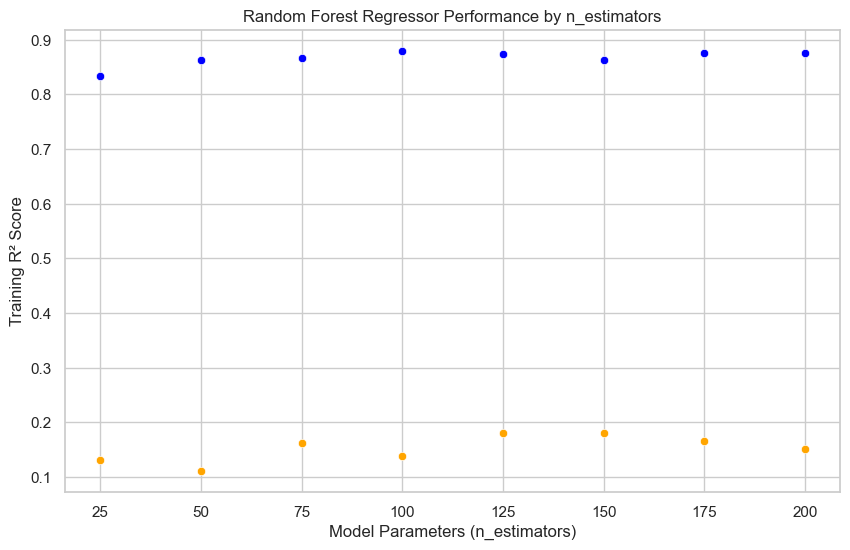

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(data=result_df, x='n_estimators', y=result_df['training_r2'], color="blue")

sns.scatterplot(data=result_df, x='n_estimators', y=result_df['cv_r2_mean'], color="orange")
# sns.boxplot(x='model_params', y='cv_r2_mean', data=result_df)

plt.title('Random Forest Regressor Performance by n_estimators')
plt.xlabel('Model Parameters (n_estimators)')
plt.ylabel(' R² Score')
plt.show()

TLDR; too slow.
-> Doing it on the entire X_subset would be slow and irrelevent while overfitting.

#### Dimensionality Reduction
- I used PCA for dimensionality reduction. 
- Justin's presentation -> # components: 10 

In [286]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

pca.fit(X_subset)
X_reduced = pca.transform(X_subset)

# cross_val_score(model, X_reduced, y, cv=5, scoring='r2')
X_reduced.shape

(898, 10)

In [119]:
model = RandomForestRegressor(n_estimators=150, max_depth=6)

In [ ]:
scores = cross_val_score(model, X_reduced, y, cv=5, scoring='r2')

In [122]:
model.fit(X_train_reduced, y_train)

,n_estimators,150
,criterion,'squared_error'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [290]:
print("model training R^2 after PCA reduction:", model.score(X_reduced, y))
print(f"CV R²: {scores.mean():.3f} ± {scores.std():.3f}")

model training R^2 after PCA reduction: 0.3658641138206171
CV R²: 0.107 ± 0.034


In [124]:
benchmark_results.loc[len(benchmark_results)] = add_benchmark_result(model, 'Random Forest Regression w/ PCA', X_test_reduced, y_test, X_train_reduced, y_train)
benchmark_results

,Model,training MSE,average testing MSE,testing R^2,CV R^2
0,Linear Regression,1.752966e-29,0.388680,1.000000,0.059445
1,Ridge Regression,3.747608e-01,0.405121,0.079024,0.033133
2,Lasso Regression,3.787560e-01,0.375531,0.069206,0.100992
3,PLS Regression,3.747608e-01,0.405123,0.079024,0.033128
4,GAM Regression,3.796860e-01,0.392399,0.066920,0.075322
5,Random Forest Regression,1.651921e-01,0.375974,0.594040,0.040998
6,Random Forest Regression w/ PCA,2.613841e-01,0.391365,0.357648,0.050157


In [125]:
benchmark_results.to_csv('model_benchmark_results.csv', index=True)

### loop-based regression

In [ ]:
result_df = pd.DataFrame(columns=['drug', 'n_samples', 'training_r2', 'cv_r2_mean', 'cv_r2_std'])
regressor = RandomForestRegressor(n_estimators=50, max_depth=5)
pca = PCA(n_components=15)


for drug in drug_cols:
	result_df = run_randomforest_regression(drug, pca, regressor, result_df)


result_df


Drug: (5Z)-7-Oxozeaenol
Samples: 857
training R^2: 0.5688204786873015
CV R²: 0.211 ± 0.080

Drug: 5-Fluorouracil
Samples: 870
training R^2: 0.4882322799942955
CV R²: 0.172 ± 0.045

Drug: 965-D2
Samples: 795
training R^2: 0.4657485460350238
CV R²: 0.045 ± 0.043

Drug: 993-D2
Samples: 797
training R^2: 0.442234078830126
CV R²: 0.074 ± 0.050

Drug: A-443654
Samples: 392
training R^2: 0.44287192181257284
CV R²: -0.062 ± 0.043

Drug: A-770041
Samples: 392
training R^2: 0.6372763343436634
CV R²: 0.023 ± 0.089

Drug: A-83-01
Samples: 874
training R^2: 0.4363388156445246
CV R²: 0.056 ± 0.031

Drug: ACY-1215
Samples: 884
training R^2: 0.637656559138466
CV R²: 0.320 ± 0.055

Drug: AGI-6780
Samples: 877
training R^2: 0.502559549036018
CV R²: 0.082 ± 0.048

Drug: AICA Ribonucleotide
Samples: 880
training R^2: 0.5636669405993048
CV R²: 0.241 ± 0.072

Drug: AKT inhibitor VIII
Samples: 886
training R^2: 0.4828353402837188
CV R²: 0.172 ± 0.073

Drug: AR-42
Samples: 862
training R^2: 0.530776069006089

,drug,n_samples,training_r2,cv_r2_mean,cv_r2_std
0,(5Z)-7-Oxozeaenol,857,0.568820,0.211005,0.080400
1,5-Fluorouracil,870,0.488232,0.171906,0.044948
2,965-D2,795,0.465749,0.045300,0.042725
3,993-D2,797,0.442234,0.074409,0.050194
4,A-443654,392,0.442872,-0.061711,0.043457
...,...,...,...,...,...
370,Zibotentan,875,0.537829,0.184907,0.065987
371,"eEF2K Inhibitor, A-484954",883,0.565321,0.151400,0.066501
372,kb NB 142-70,886,0.587212,0.170320,0.025852
373,rTRAIL,864,0.444386,0.018117,0.050280


In [259]:
forest_result_df = result_df.sort_values(by='n_samples', ascending=False)
forest_result_df

,drug,n_samples,training_r2,cv_r2_mean,cv_r2_std
44,Avagacestat,916,0.393222,0.032408,0.042060
287,SB505124,914,0.522487,0.159031,0.059293
87,CHIR-99021,913,0.507066,0.152483,0.053976
114,Doxorubicin,913,0.503146,0.102551,0.037034
334,UNC0638,913,0.563134,0.174600,0.065411
...,...,...,...,...,...
111,Dasatinib,387,0.703821,0.197377,0.068290
185,JW-7-52-1,379,0.541520,-0.026522,0.101033
281,Rapamycin,354,0.617318,-0.069423,0.064534
161,HG-6-71-01,123,0.822313,0.090328,0.202835
